# Readme

* start acq X1 X2 X3 -------> X1 is PP in ns, X2 is PN in ns, X3 is PD in ns this starts the acquisitions syncing with the pulse.
* write dac X -------> X is the dac number I forgot the min and the max but it may be from 0 to 400.
* write mux XXXX ---> where XXXX is the word to be sent to the MAX14866.
* clear mux -- opens every switch
* set mux -- closes every switch
* read -------> read the obtained acquisitions (8000pts).

In [ ]:
%load_ext autoreload
%autoreload 2

from pico import Pic0rick, pplot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial   
import datetime
import time
import glob
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Creates pairs of switches to check

In [195]:
TODO = []
for k in range(1023): 
    lst = [int(x) for x in bin(k)[2:]]
    ODD = np.sum(lst[1::2])
    EVEN = np.sum(lst[: : 2])
    if ( (ODD ==1 ) and (EVEN == 1) ) or (k == 0):
        TODO.append(k)


# Open the device

In [ ]:
p = Pic0rick()

## Running the acquisitions

DAC  	 bytearray(b'write dac 300\n')
Gain b'' b'run> write dac 300\r\n' b'DAC writing started\r\n' b'DAC writing ended\r\n'
DAC  	 bytearray(b'write dac 300\n')
Gain b'run> write dac 300\r\n' b'DAC writing started\r\n' b'DAC writing ended\r\n' b'run> '
144
MUX: 	 bytearray(b'write mux 0090\n')
b'write mux 0090\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
MUX: 	 bytearray(b'write mux 0090\n')
b'write mux 0090\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
DAC  	 bytearray(b'write dac 350\n')
Gain b'write dac 350\r\n' b'DAC writing started\r\n' b'DAC writing ended\r\n' b'run> '
Pulse	 bytearray(b'start acq 125 125 7000\n')
READ 	 bytearray(b'read\n')
8001 b'run> read\r\n' b'----------Start of ACQ----------\r\n' b'-----------End of ACQ-----------\r\n' b'run> '
258
MUX: 	 bytearray(b'write mux 0102\n')
b'write mux 0102\r\n' b'MAX14866 writing started\r\n' b'MAX14866 writing ended\r\n' b'run> '
MUX: 	 bytearray(b'write mux 0102\n')

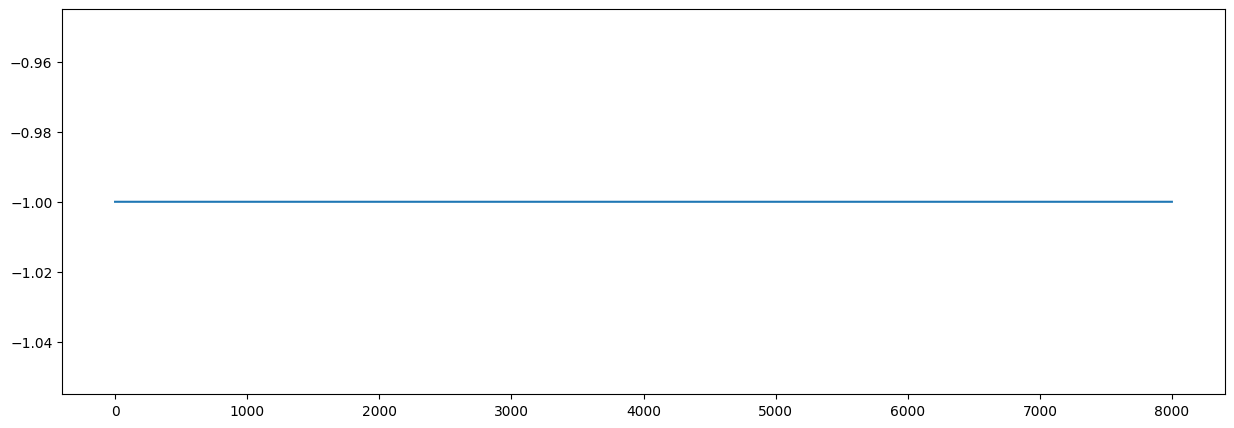

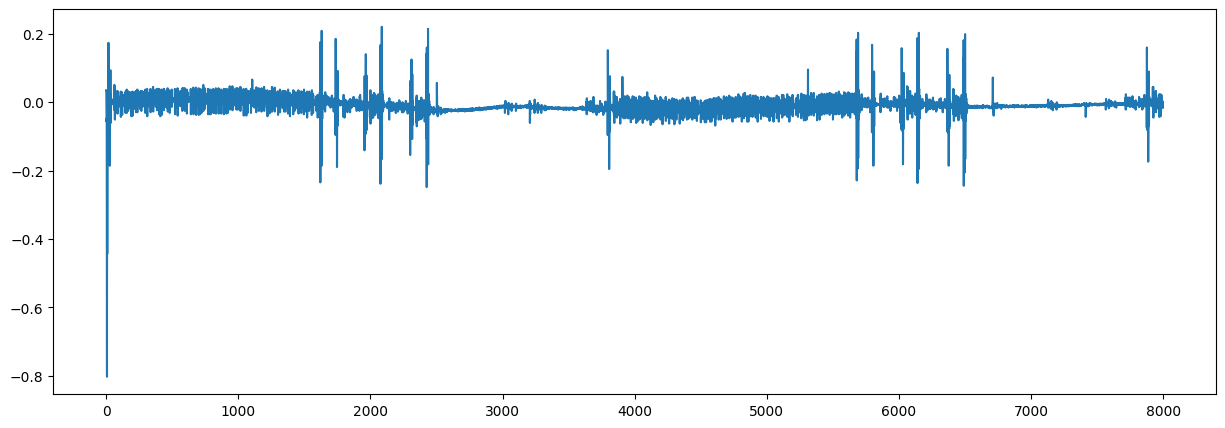

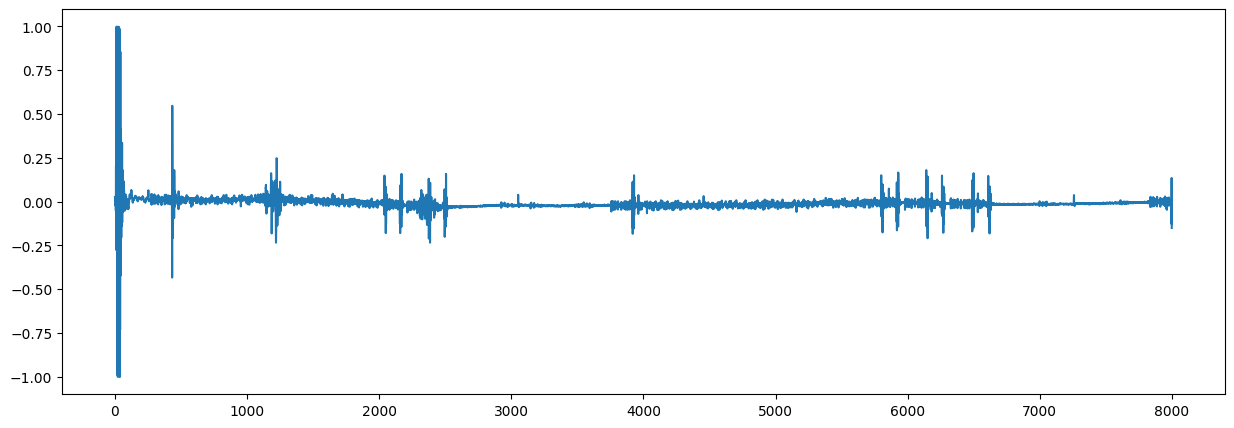

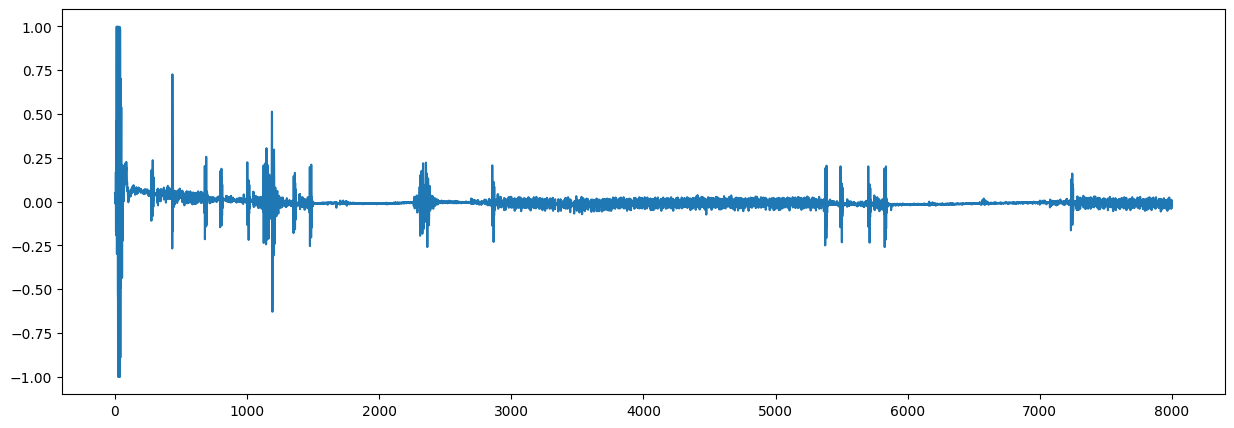

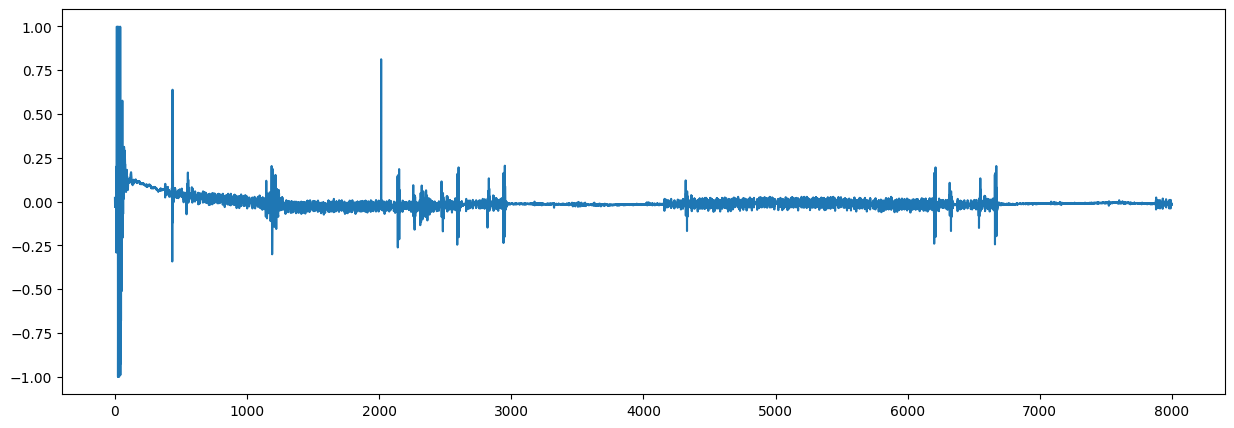

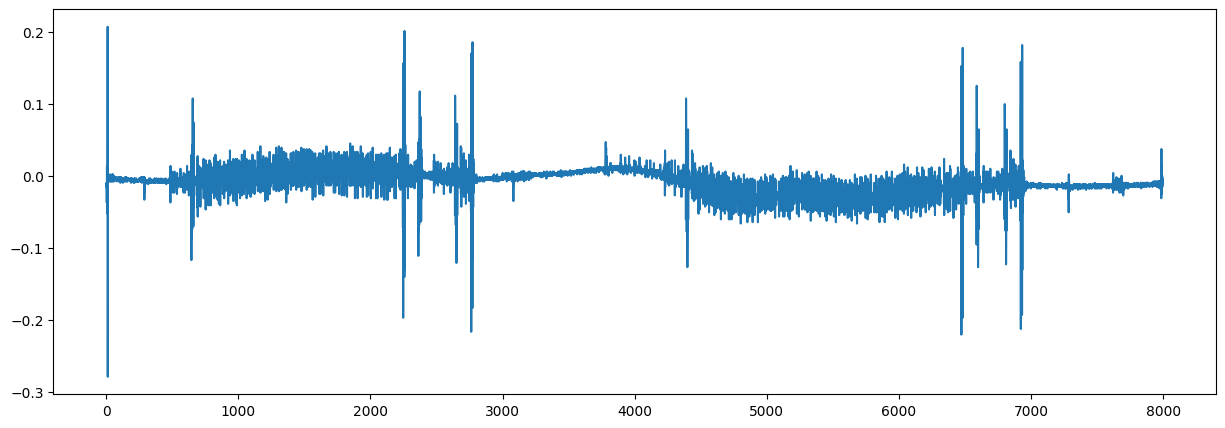

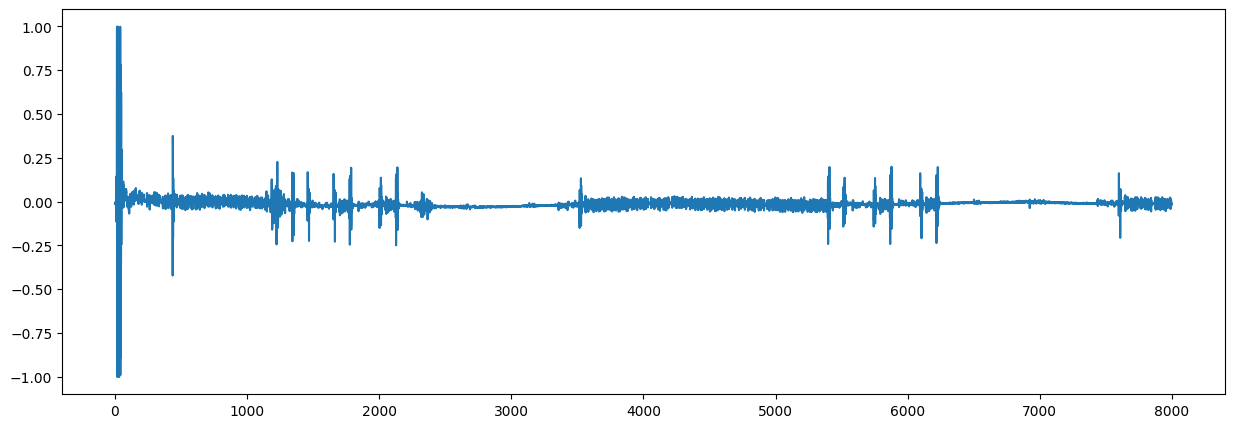

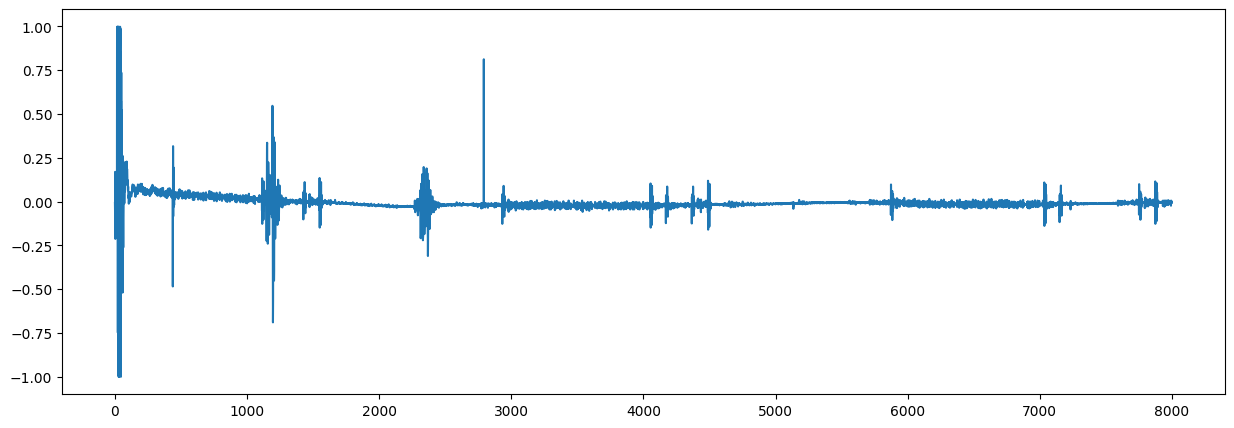

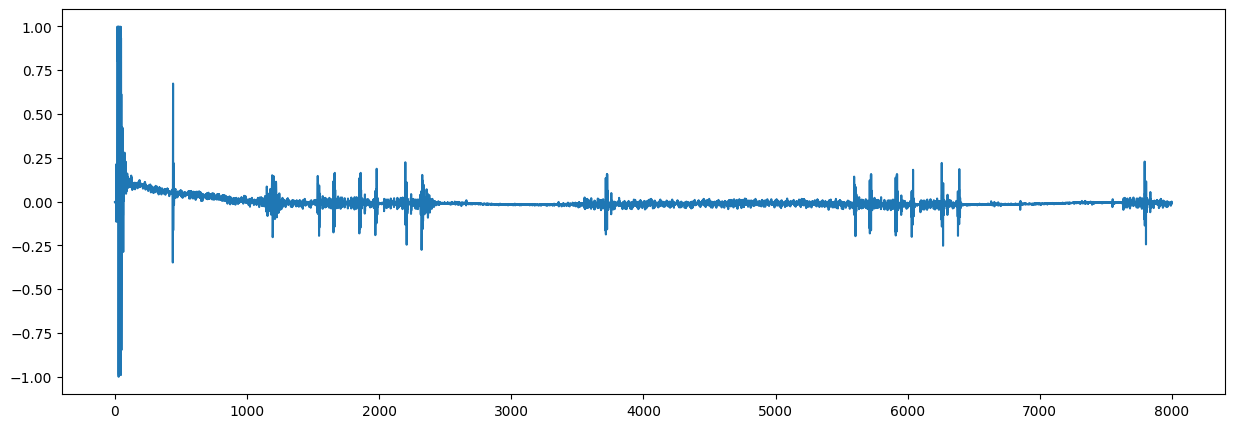

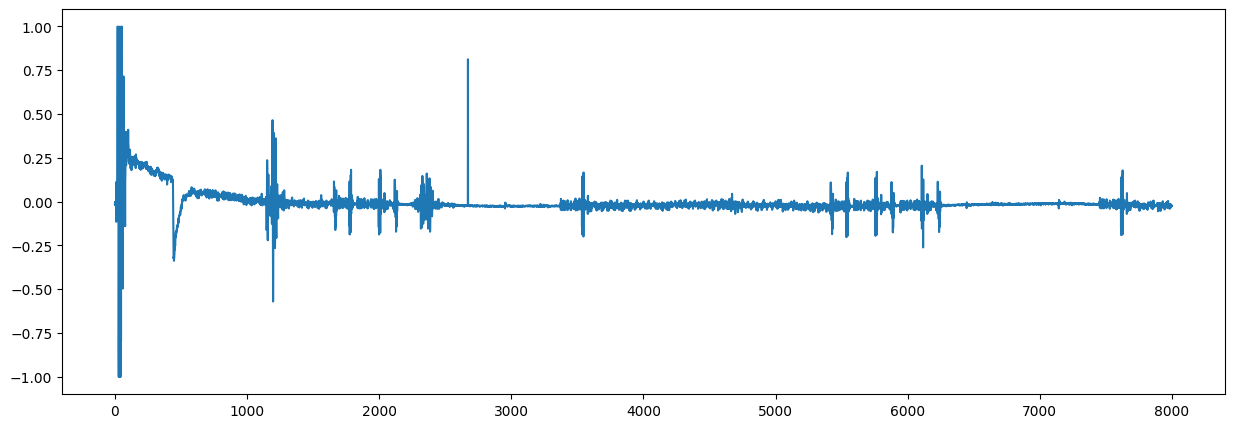

In [ ]:
gain = 300

for k in TODO:
    MUX = f"0x{k:04x}"[2:]
    IMG = "imgs/rp2350_mux/"+MUX+".jpg"
    if not os.path.isfile(IMG):
        print("Doing value:",k)

        p.setmux(MUX)
        p.dac(gain)
        p.pulse(125,125,7000)
        signal = p.read()

        pplot(signal, G= gain)

In [ ]:
ser.close()